In [2]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [3]:
!pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.0/781.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 117.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 116.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 825.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/19

# Milestone 2 - Training Transformer Models with GloVe embeddings

In [1]:
!pip install torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.9 MB/s eta 0:00:00


### Imports

In [1]:
%cd ..
# imports
from scripts_m2 import *


/


/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated

### 1. Get Dataloaders

In [7]:
train_dataloader, dev_dataloader, tokenizer = prepare_dataloaders_tokenizer_glove()

Filtered dataset size: 19900 out of original 20000
Filtered dataset size: 1986 out of original 2000


### 2. Model Training

#### Question [PAD] [SEP] Context [PAD]

In [8]:
print(tokenizer.get_pretrained_embeddings().shape)

torch.Size([400006, 300])


In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model = TransformerQAModel3(
    vocab_size=10_000,
    d_model=300,
    num_layers=4,
    num_heads=6,
    dim_feedforward=512,
    max_question_len=20,
    max_context_len=249,
    dropout=0.01,
    pretrained_embeddings=tokenizer.get_pretrained_embeddings(),
    freeze_embeddings=True,
)
model = model.to(device)

# Setup an optimizer (e.g., Adam)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_loss, val_loss = train_qa_context_model_boilerplate(
    model=model,
    train_dataloader=train_dataloader,
    val_dataloader=dev_dataloader,
    optimizer=optimizer,
    criterion=criterion,
    num_epochs=10,
    device=device,
    inputs = ["context_question", "attention_mask_context_question"],
    evaluate_val_dataset=True,
)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 1/10: 100%|██████████| 311/311 [01:46<00:00,  2.91it/s, loss=7.16]


Epoch 1 Loss: 7.9553


Evaluating: 100%|██████████| 311/311 [01:13<00:00,  4.22it/s]


Training Loss: 7.0516
Training Metrics: {'start_accuracy': 0.1606030150753769, 'start_precision': 0.1649086328375284, 'start_recall': 0.1606030150753769, 'start_f1_score': 0.1596812410852993, 'end_accuracy': 0.16698492462311557, 'end_precision': 0.17463271589165058, 'end_recall': 0.16698492462311557, 'end_f1_score': 0.16715886422969242, 'joint_exact_match': np.float64(0.1272361809045226), 'span_overlap_f1': np.float64(0.140417168585722)}


Evaluating: 100%|██████████| 32/32 [00:06<00:00,  4.64it/s]


Validation Loss: 8.4029
Validation Metrics: {'start_accuracy': 0.08761329305135952, 'start_precision': 0.1216641184875684, 'start_recall': 0.08761329305135952, 'start_f1_score': 0.08867171528953247, 'end_accuracy': 0.08710976837865056, 'end_precision': 0.10001979842689256, 'end_recall': 0.08710976837865056, 'end_f1_score': 0.08704153234631132, 'joint_exact_match': np.float64(0.06646525679758308), 'span_overlap_f1': np.float64(0.07779636530383446)}
Validation loss improved to 8.4029. Saving model state.
--------------------------------------------------


Epoch 2/10: 100%|██████████| 311/311 [01:46<00:00,  2.91it/s, loss=6.84]


Epoch 2 Loss: 6.9689


Evaluating: 100%|██████████| 311/311 [01:13<00:00,  4.24it/s]


Training Loss: 6.3834
Training Metrics: {'start_accuracy': 0.19331658291457288, 'start_precision': 0.19722693797085256, 'start_recall': 0.19331658291457288, 'start_f1_score': 0.1927455705327044, 'end_accuracy': 0.19859296482412062, 'end_precision': 0.20497943085628204, 'end_recall': 0.19859296482412062, 'end_f1_score': 0.19887735158654848, 'joint_exact_match': np.float64(0.16336683417085426), 'span_overlap_f1': np.float64(0.1768223455471263)}


Evaluating: 100%|██████████| 32/32 [00:07<00:00,  4.37it/s]


Validation Loss: 7.8611
Validation Metrics: {'start_accuracy': 0.09919436052366566, 'start_precision': 0.10947514504756094, 'start_recall': 0.09919436052366566, 'start_f1_score': 0.09717065887230927, 'end_accuracy': 0.1027190332326284, 'end_precision': 0.11113342234313812, 'end_recall': 0.1027190332326284, 'end_f1_score': 0.10069986241654762, 'joint_exact_match': np.float64(0.07905337361530715), 'span_overlap_f1': np.float64(0.09180709001177777)}
Validation loss improved to 7.8611. Saving model state.
--------------------------------------------------


Epoch 3/10: 100%|██████████| 311/311 [01:47<00:00,  2.90it/s, loss=5.94]


Epoch 3 Loss: 6.4732


Evaluating: 100%|██████████| 311/311 [01:13<00:00,  4.25it/s]


Training Loss: 6.1745
Training Metrics: {'start_accuracy': 0.21939698492462312, 'start_precision': 0.22527074456876084, 'start_recall': 0.21939698492462312, 'start_f1_score': 0.21988638326295468, 'end_accuracy': 0.22396984924623115, 'end_precision': 0.23314253535827859, 'end_recall': 0.22396984924623115, 'end_f1_score': 0.22560399908322018, 'joint_exact_match': np.float64(0.18829145728643215), 'span_overlap_f1': np.float64(0.20400145912878762)}


Evaluating: 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]


Validation Loss: 7.7389
Validation Metrics: {'start_accuracy': 0.11027190332326284, 'start_precision': 0.1295479112147459, 'start_recall': 0.11027190332326284, 'start_f1_score': 0.11298249615118715, 'end_accuracy': 0.1148036253776435, 'end_precision': 0.13422404432439156, 'end_recall': 0.1148036253776435, 'end_f1_score': 0.11692647382133595, 'joint_exact_match': np.float64(0.09113796576032225), 'span_overlap_f1': np.float64(0.10509059605668918)}
Validation loss improved to 7.7389. Saving model state.
--------------------------------------------------


Epoch 4/10: 100%|██████████| 311/311 [01:46<00:00,  2.92it/s, loss=6.32]


Epoch 4 Loss: 6.2517


Evaluating: 100%|██████████| 311/311 [01:13<00:00,  4.22it/s]


Training Loss: 6.2527
Training Metrics: {'start_accuracy': 0.21814070351758794, 'start_precision': 0.22309058370438775, 'start_recall': 0.21814070351758794, 'start_f1_score': 0.21861765856217158, 'end_accuracy': 0.23155778894472362, 'end_precision': 0.23920678902419948, 'end_recall': 0.23155778894472362, 'end_f1_score': 0.2331134401397387, 'joint_exact_match': np.float64(0.18597989949748744), 'span_overlap_f1': np.float64(0.20249990557256195)}


Evaluating: 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]


Validation Loss: 8.0943
Validation Metrics: {'start_accuracy': 0.10926485397784491, 'start_precision': 0.11815810325055517, 'start_recall': 0.10926485397784491, 'start_f1_score': 0.1088400643884675, 'end_accuracy': 0.11782477341389729, 'end_precision': 0.13528471558440666, 'end_recall': 0.11782477341389729, 'end_f1_score': 0.11782189442460744, 'joint_exact_match': np.float64(0.08710976837865056), 'span_overlap_f1': np.float64(0.10364315550997415)}
Validation loss did not improve. No improvement for 1 epochs.
--------------------------------------------------


Epoch 5/10: 100%|██████████| 311/311 [01:46<00:00,  2.91it/s, loss=5.86]


Epoch 5 Loss: 6.1535


Evaluating: 100%|██████████| 311/311 [01:14<00:00,  4.15it/s]


Training Loss: 5.7587
Training Metrics: {'start_accuracy': 0.2560804020100503, 'start_precision': 0.2617606890789414, 'start_recall': 0.2560804020100503, 'start_f1_score': 0.25673839290978884, 'end_accuracy': 0.26321608040201006, 'end_precision': 0.27141492326822164, 'end_recall': 0.26321608040201006, 'end_f1_score': 0.2650608701932785, 'joint_exact_match': np.float64(0.21603015075376886), 'span_overlap_f1': np.float64(0.23203213825697358)}


Evaluating: 100%|██████████| 32/32 [00:07<00:00,  4.15it/s]


Validation Loss: 7.6045
Validation Metrics: {'start_accuracy': 0.13141993957703926, 'start_precision': 0.14362086104727692, 'start_recall': 0.13141993957703926, 'start_f1_score': 0.13035933524049936, 'end_accuracy': 0.13494461228600202, 'end_precision': 0.15345632765375533, 'end_recall': 0.13494461228600202, 'end_f1_score': 0.13456825434269276, 'joint_exact_match': np.float64(0.1052366565961732), 'span_overlap_f1': np.float64(0.12101165898657372)}
Validation loss improved to 7.6045. Saving model state.
--------------------------------------------------


Epoch 6/10: 100%|██████████| 311/311 [01:46<00:00,  2.91it/s, loss=5.43]


Epoch 6 Loss: 5.8808


Evaluating: 100%|██████████| 311/311 [01:14<00:00,  4.17it/s]


Training Loss: 5.5742
Training Metrics: {'start_accuracy': 0.2614572864321608, 'start_precision': 0.284735532346367, 'start_recall': 0.2614572864321608, 'start_f1_score': 0.26914791304368396, 'end_accuracy': 0.27100502512562813, 'end_precision': 0.2783607304426325, 'end_recall': 0.27100502512562813, 'end_f1_score': 0.27236793653515445, 'joint_exact_match': np.float64(0.21467336683417085), 'span_overlap_f1': np.float64(0.23313645908871306)}


Evaluating: 100%|██████████| 32/32 [00:07<00:00,  4.25it/s]


Validation Loss: 7.7077
Validation Metrics: {'start_accuracy': 0.13293051359516617, 'start_precision': 0.16569109292311973, 'start_recall': 0.13293051359516617, 'start_f1_score': 0.13526591825434647, 'end_accuracy': 0.1364551863041289, 'end_precision': 0.15852125756333332, 'end_recall': 0.1364551863041289, 'end_f1_score': 0.13728140803493782, 'joint_exact_match': np.float64(0.09919436052366566), 'span_overlap_f1': np.float64(0.12104448610476204)}
Validation loss did not improve. No improvement for 1 epochs.
--------------------------------------------------


Epoch 7/10: 100%|██████████| 311/311 [01:46<00:00,  2.91it/s, loss=6.59]


Epoch 7 Loss: 5.6872


Evaluating: 100%|██████████| 311/311 [01:14<00:00,  4.17it/s]


Training Loss: 5.4706
Training Metrics: {'start_accuracy': 0.27035175879396983, 'start_precision': 0.2755962442662247, 'start_recall': 0.27035175879396983, 'start_f1_score': 0.27076302341530145, 'end_accuracy': 0.2767839195979899, 'end_precision': 0.28601417577289484, 'end_recall': 0.2767839195979899, 'end_f1_score': 0.27848396801100894, 'joint_exact_match': np.float64(0.23110552763819095), 'span_overlap_f1': np.float64(0.2479309171873859)}


Evaluating: 100%|██████████| 32/32 [00:07<00:00,  4.38it/s]


Validation Loss: 7.8226
Validation Metrics: {'start_accuracy': 0.1268882175226586, 'start_precision': 0.1597846938485168, 'start_recall': 0.1268882175226586, 'start_f1_score': 0.12729721831410878, 'end_accuracy': 0.13544813695871097, 'end_precision': 0.1596716442870289, 'end_recall': 0.13544813695871097, 'end_f1_score': 0.13732000378903833, 'joint_exact_match': np.float64(0.10322255790533737), 'span_overlap_f1': np.float64(0.12027738395359122)}
Validation loss did not improve. No improvement for 2 epochs.
--------------------------------------------------


Epoch 8/10: 100%|██████████| 311/311 [01:47<00:00,  2.90it/s, loss=5.93]


Epoch 8 Loss: 5.8366


Evaluating: 100%|██████████| 311/311 [01:14<00:00,  4.19it/s]


Training Loss: 6.1210
Training Metrics: {'start_accuracy': 0.22768844221105528, 'start_precision': 0.2327501737218847, 'start_recall': 0.22768844221105528, 'start_f1_score': 0.2284387730920862, 'end_accuracy': 0.23658291457286432, 'end_precision': 0.24353055707959595, 'end_recall': 0.23658291457286432, 'end_f1_score': 0.23785414624829734, 'joint_exact_match': np.float64(0.19949748743718593), 'span_overlap_f1': np.float64(0.21501822805840232)}


Evaluating: 100%|██████████| 32/32 [00:07<00:00,  4.08it/s]


Validation Loss: 8.0029
Validation Metrics: {'start_accuracy': 0.10725075528700906, 'start_precision': 0.12211529733013898, 'start_recall': 0.10725075528700906, 'start_f1_score': 0.10779383921717052, 'end_accuracy': 0.12185297079556898, 'end_precision': 0.13431741418881893, 'end_recall': 0.12185297079556898, 'end_f1_score': 0.12186720697353157, 'joint_exact_match': np.float64(0.09013091641490432), 'span_overlap_f1': np.float64(0.10665019000061839)}
Validation loss did not improve. No improvement for 3 epochs.
--------------------------------------------------


Epoch 9/10: 100%|██████████| 311/311 [01:48<00:00,  2.87it/s, loss=5.24]


Epoch 9 Loss: 5.3821


Evaluating: 100%|██████████| 311/311 [01:15<00:00,  4.10it/s]


Training Loss: 4.9941
Training Metrics: {'start_accuracy': 0.3, 'start_precision': 0.30285210978766763, 'start_recall': 0.3, 'start_f1_score': 0.2995821979845116, 'end_accuracy': 0.30778894472361806, 'end_precision': 0.31409787941139033, 'end_recall': 0.30778894472361806, 'end_f1_score': 0.3086290022082383, 'joint_exact_match': np.float64(0.2570854271356784), 'span_overlap_f1': np.float64(0.2741277468881437)}


Evaluating: 100%|██████████| 32/32 [00:07<00:00,  4.42it/s]


Validation Loss: 7.9381
Validation Metrics: {'start_accuracy': 0.1364551863041289, 'start_precision': 0.15090735146552264, 'start_recall': 0.1364551863041289, 'start_f1_score': 0.1361991938752217, 'end_accuracy': 0.1500503524672709, 'end_precision': 0.16981957690021168, 'end_recall': 0.1500503524672709, 'end_f1_score': 0.15056198354773778, 'joint_exact_match': np.float64(0.11278952668680765), 'span_overlap_f1': np.float64(0.13081454076263643)}
Validation loss did not improve. No improvement for 4 epochs.
--------------------------------------------------


Epoch 10/10: 100%|██████████| 311/311 [01:47<00:00,  2.89it/s, loss=4.88]


Epoch 10 Loss: 5.0359


Evaluating: 100%|██████████| 311/311 [01:14<00:00,  4.20it/s]


Training Loss: 4.7906
Training Metrics: {'start_accuracy': 0.3168844221105528, 'start_precision': 0.32202659846144177, 'start_recall': 0.3168844221105528, 'start_f1_score': 0.3169511328348281, 'end_accuracy': 0.32321608040201005, 'end_precision': 0.3298983653540334, 'end_recall': 0.32321608040201005, 'end_f1_score': 0.3241275319923321, 'joint_exact_match': np.float64(0.27673366834170854), 'span_overlap_f1': np.float64(0.294460197170112)}


Evaluating: 100%|██████████| 32/32 [00:06<00:00,  4.61it/s]

Validation Loss: 8.1551
Validation Metrics: {'start_accuracy': 0.13846928499496475, 'start_precision': 0.1527335719905961, 'start_recall': 0.13846928499496475, 'start_f1_score': 0.13891838820326427, 'end_accuracy': 0.14803625377643503, 'end_precision': 0.16599470979710157, 'end_recall': 0.14803625377643503, 'end_f1_score': 0.1486924724942167, 'joint_exact_match': np.float64(0.11933534743202417), 'span_overlap_f1': np.float64(0.1362985430571735)}
Validation loss did not improve. No improvement for 5 epochs.
Early stopping triggered.
Loaded the best model state.


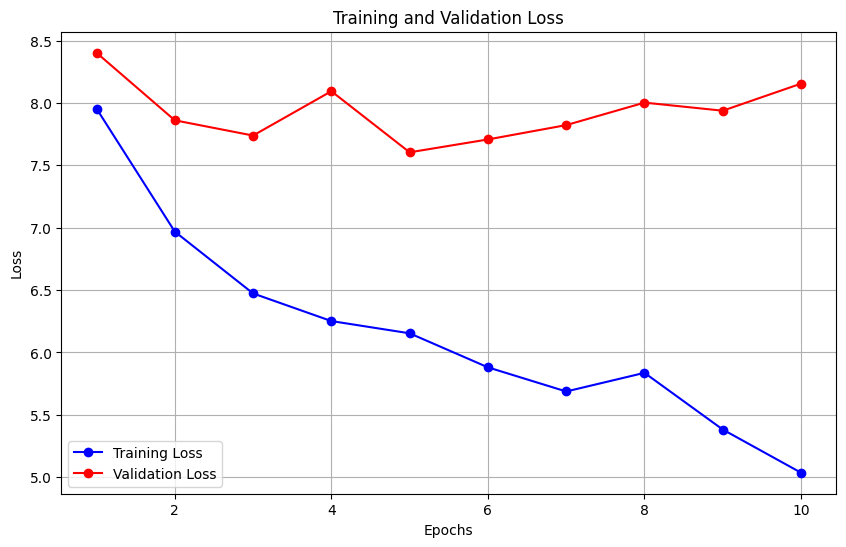

In [13]:
# Plotting the training and validation loss
plot_loss_curves(train_loss, val_loss)

#### Save Model

In [17]:
model_path = "models/glove_qa_context_model_transformer.pkl"

In [18]:
save_model(model, model_path)

Model saved to glove_qa_context_model_transformer.pkl


In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_model(model_path=model_path)

Model loaded from glove_qa_context_model_transformer.pkl


#### Evaluation

In [20]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
evaluate_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, criterion=criterion, device=device, inputs = ["context_question", "attention_mask_context_question"])

Evaluating: 100%|██████████| 311/311 [01:14<00:00,  4.16it/s]

Validation Loss: 5.7587
Validation Metrics: {'start_accuracy': 0.2560804020100503, 'start_precision': 0.2617606890789414, 'start_recall': 0.2560804020100503, 'start_f1_score': 0.25673839290978884, 'end_accuracy': 0.26321608040201006, 'end_precision': 0.27141492326822164, 'end_recall': 0.26321608040201006, 'end_f1_score': 0.2650608701932785, 'joint_exact_match': np.float64(0.21603015075376886), 'span_overlap_f1': np.float64(0.23203213825697352)}


(5.758705855182513,
 {'start_accuracy': 0.2560804020100503,
  'start_precision': 0.2617606890789414,
  'start_recall': 0.2560804020100503,
  'start_f1_score': 0.25673839290978884,
  'end_accuracy': 0.26321608040201006,
  'end_precision': 0.27141492326822164,
  'end_recall': 0.26321608040201006,
  'end_f1_score': 0.2650608701932785,
  'joint_exact_match': np.float64(0.21603015075376886),
  'span_overlap_f1': np.float64(0.23203213825697352)})

In [21]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss()
evaluate_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, criterion=criterion, device=device, inputs = ["context_question", "attention_mask_context_question"])

Evaluating: 100%|██████████| 32/32 [00:07<00:00,  4.39it/s]

Validation Loss: 7.6045
Validation Metrics: {'start_accuracy': 0.13141993957703926, 'start_precision': 0.14362086104727692, 'start_recall': 0.13141993957703926, 'start_f1_score': 0.13035933524049936, 'end_accuracy': 0.13494461228600202, 'end_precision': 0.15345632765375533, 'end_recall': 0.13494461228600202, 'end_f1_score': 0.13456825434269276, 'joint_exact_match': np.float64(0.1052366565961732), 'span_overlap_f1': np.float64(0.12101165898657372)}


(7.604488790035248,
 {'start_accuracy': 0.13141993957703926,
  'start_precision': 0.14362086104727692,
  'start_recall': 0.13141993957703926,
  'start_f1_score': 0.13035933524049936,
  'end_accuracy': 0.13494461228600202,
  'end_precision': 0.15345632765375533,
  'end_recall': 0.13494461228600202,
  'end_f1_score': 0.13456825434269276,
  'joint_exact_match': np.float64(0.1052366565961732),
  'span_overlap_f1': np.float64(0.12101165898657372)})

##### Evaluate predictions on test set

In [22]:
preds, true_labels, contexts, questions = predict_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, tokenizer=tokenizer, device=device, inputs = ["context_question", "attention_mask_context_question"])

Predicting: 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]


In [23]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {questions[i]}")
    print(f"Context: {contexts[i]}")
    print(f"Predicted Answer: {preds[i]}")
    print(f"True Answer: {true_labels[i]}")
    print("-" * 50)

Question: how many khitan tumens were there ?
Context: many han chinese and khitan defected to mongols to fight against jin . two han chinese leaders , shi , liu ( , liu ni ) , and khitan xiao ( ) defected and commanded 3 tumens in mongol army . liu and shi served khan . liu and shi tianxiang led armies against western xia for mongols . there were 4 han tumens and 3 khitan tumens , with each tumen consisting of 10 , 000 troops . three khitan generals ( ) , ( ) and ( ) commanded three khitan tumens and four han generals zhang rou , yan shi , shi , and liu commanded four han tumens under khan .
Predicted Answer: 
True Answer: 3
--------------------------------------------------
Question: what is atomic number of element oxygen ?
Context: oxygen is a chemical element with symbol o and atomic number 8 . it is a member of group on periodic table and is a highly reactive nonmetal and oxidizing agent that readily forms compounds ( notably oxides ) with most elements . by mass , oxygen is thir

##### Evaluate predictions on training set

In [24]:
train_preds, train_true_labels, train_contexts, train_questions = predict_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, tokenizer=tokenizer, device=device, inputs = ["context_question", "attention_mask_context_question"])

Predicting: 100%|██████████| 311/311 [01:17<00:00,  4.03it/s]


In [25]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {train_questions[i]}")
    print(f"Context: {train_contexts[i]}")
    print(f"Predicted Answer: {train_preds[i]}")
    print(f"True Answer: {train_true_labels[i]}")
    print("-" * 50)

Question: how many of fortune 500 companies are based in seattle ?
Context: still , very large companies dominate business landscape . four companies on 2013 fortune 500 list of united states ' largest companies , based on total revenue , are headquartered in seattle internet retailer amazon . com ( ) , coffee chain starbucks ( ) , department store nordstrom ( ) , and freight forwarder expeditors international of washington ( ) . other fortune 500 companies popularly associated with seattle are based in nearby puget sound cities . warehouse club chain costco ( ) , largest retail company in washington , is based in issaquah . microsoft ( ) is located in redmond . weyerhaeuser , forest products company ( ) , is based in federal way . finally , bellevue is home to truck manufacturer paccar ( ) . other major companies in area include nintendo of america in redmond , t-mobile us in bellevue , expedia inc . in bellevue and providence health & services — state ' s largest health care system a